## Introduction

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

### Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:

import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv('data/tmdb_5000_movies.csv')
movies.head(5)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [3]:
credits = pd.read_csv('data/tmdb_5000_credits.csv')

In [4]:
credits.head(5)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [5]:
pip install jason

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install simplejson

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install django

Note: you may need to restart the kernel to use updated packages.


In [8]:
# merge movie with credicts
fullmovie = movies.merge(credits, how = 'left', left_on = 'id', right_on= 'movie_id')

In [9]:
fullmovie.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [10]:
fullmovie=fullmovie.drop(columns= ['original_title', 'title_x', 'movie_id','id','status','homepage','original_language','spoken_languages','crew','production_countries'], inplace = False)

In [11]:
fullmovie.columns

Index(['budget', 'genres', 'keywords', 'overview', 'popularity',
       'production_companies', 'release_date', 'revenue', 'runtime', 'tagline',
       'vote_average', 'vote_count', 'title_y', 'cast'],
      dtype='object')

In [12]:
fullmovie.rename(columns = {'title_y':'title'}, inplace = True) # rename the title column back to 'title'

In [13]:
# remove rows with no generes information

new_fullmovie=fullmovie[~(fullmovie['genres'].str.len() == 0)]

In [14]:
new_fullmovie

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
5     258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...   
6     260000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   
7     280000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
8     250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
9     250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
10    270000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
11    200000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
12    200000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
13    255000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
14    225000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
15    225000000  [{"id": 12, "name": "Adventure"}, {"id": 10751...   
16    220000000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
17    380000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
18    225000000  [{"id": 28, "name": "Action"}, {"id": 35, "nam...   
19    250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
20    215000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
21    200000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
22    250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
23    180000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
24    207000000  [{"id": 12, "name": "Adventure"}, {"id": 18, "...   
25    200000000  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   
26    250000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   
27    209000000  [{"id": 53, "name": "Thriller"}, {"id": 28, "n...   
28    150000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
29    200000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4773      27000                     [{"id": 35, "name": "Comedy"}]   
4774      27000  [{"id": 18, "name": "Drama"}, {"id": 10749, "n...   
4775          0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   
4776          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4777          0                      [{"id": 18, "name": "Drama"}]   
4778          0  [{"id": 28, "name": "Action"}, {"id": 18, "nam...   
4779          0                     [{"id": 35, "name": "Comedy"}]   
4780          0  [{"id": 53, "name": "Thriller"}, {"id": 80, "n...   
4781      22000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4782          0  [{"id": 18, "name": "Drama"}, {"id": 10751, "n...   
4783          0  [{"id": 53, "name": "Thriller"}, {"id": 27, "n...   
4784          0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   
4785          0                      [{"id": 18, "name": "Drama"}]   
4786          0  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4787          0  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4788      12000  [{"id": 27, "name": "Horror"}, {"id": 35, "nam...   
4789          0                      [{"id": 18, "name": "Drama"}]   
4790          0  [{"id": 18, "name": "Drama"}, {"id": 10769, "n...   
4791         13                     [{"id": 27, "name": "Horror"}]   
4792      20000  [{"id": 80, "name": "Crime"}, {"id": 27, "name...   
4793          0                      [{"id": 18, "name": "Drama"}]   
4794          0  [{"id": 53, "name": "Thriller"}, {"id": 27, "n...   
4795          0                      [{"id": 18, "name": "Drama"}]   
4796       7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4797          0  [{"id": 10769, "name": "Foreign"}, {"id": 53, ...   
4798     220000  [{

In [15]:
# check if there is null values
new_fullmovie.isnull().sum()/new_fullmovie.isnull().count()
# the very small protion of missing values comes from the string type  variable, so I can leave it there here 
# later on I will convert the language type variables into words tokenized feature, so there won't be missing values issue of that


budget                  0.000000
genres                  0.000000
keywords                0.000000
overview                0.000625
popularity              0.000000
production_companies    0.000000
release_date            0.000208
revenue                 0.000000
runtime                 0.000416
tagline                 0.175724
vote_average            0.000000
vote_count              0.000000
title                   0.000000
cast                    0.000000
dtype: float64

In [16]:
#extract genres from the column genres
import json
import simplejson
def extract_genres(data, key='name', separator='|'):
    elements = json.loads(data)
    targets = []
    for element in elements:
        targets.append(element[key])
    return separator.join(targets)

In [17]:
new_fullmovie['genres']=new_fullmovie['genres'].apply(extract_genres)

In [18]:
new_fullmovie['keywords']=new_fullmovie['keywords'].apply(extract_genres)

In [19]:
new_fullmovie['production_compaines']=new_fullmovie['production_companies'].apply(extract_genres)

In [20]:
new_fullmovie['cast']=new_fullmovie['cast'].apply(extract_genres)

In [21]:
new_fullmovie.head()
movie_df_complete=new_fullmovie

In [22]:
new_fullmovie['cast'].head(5)

0    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
1    Johnny Depp|Orlando Bloom|Keira Knightley|Stel...
2    Daniel Craig|Christoph Waltz|Léa Seydoux|Ralph...
3    Christian Bale|Michael Caine|Gary Oldman|Anne ...
4    Taylor Kitsch|Lynn Collins|Samantha Morton|Wil...
Name: cast, dtype: object

In [23]:
type(new_fullmovie.cast)

pandas.core.series.Series

In [24]:
new_fullmovie.cast.head(5)

0    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
1    Johnny Depp|Orlando Bloom|Keira Knightley|Stel...
2    Daniel Craig|Christoph Waltz|Léa Seydoux|Ralph...
3    Christian Bale|Michael Caine|Gary Oldman|Anne ...
4    Taylor Kitsch|Lynn Collins|Samantha Morton|Wil...
Name: cast, dtype: object

In [25]:
# only pick the first actor in the string here
new_fullmovie['actor1']=new_fullmovie['cast'].apply(lambda x: x.split('|')[0])


In [26]:
#actors_df=new_fullmovie['cast'].str.split(pat='|',expand=True) # For split actors/actress names in each column long strings
#print(actors_df.head(10))
#actors_df.info()

In [27]:
new_fullmovie["actor1"]= new_fullmovie["actor1"].str.replace(' ', '')

In [28]:
# function for text cleaning 
import re
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [29]:
#split all the words for counting frequency later
new_fullmovie['keywords'] = new_fullmovie['keywords'].apply(lambda x: clean_text(x))

In [30]:
new_fullmovie['production_compaines'] = new_fullmovie['production_companies'].apply(lambda x: clean_text(x))

In [31]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [32]:
import nltk

In [33]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  

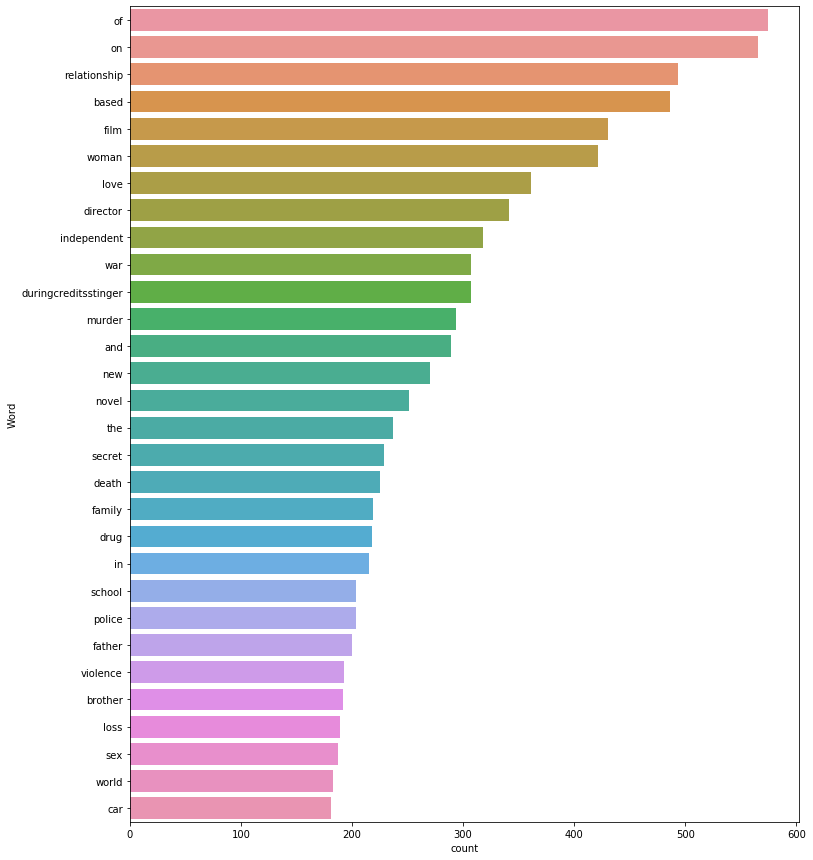

In [34]:
# print 30 most frequent words 
freq_words(new_fullmovie['keywords'], 30)

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yinan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [37]:
new_fullmovie['keywords'] = new_fullmovie['keywords'].apply(lambda x: remove_stopwords(x))

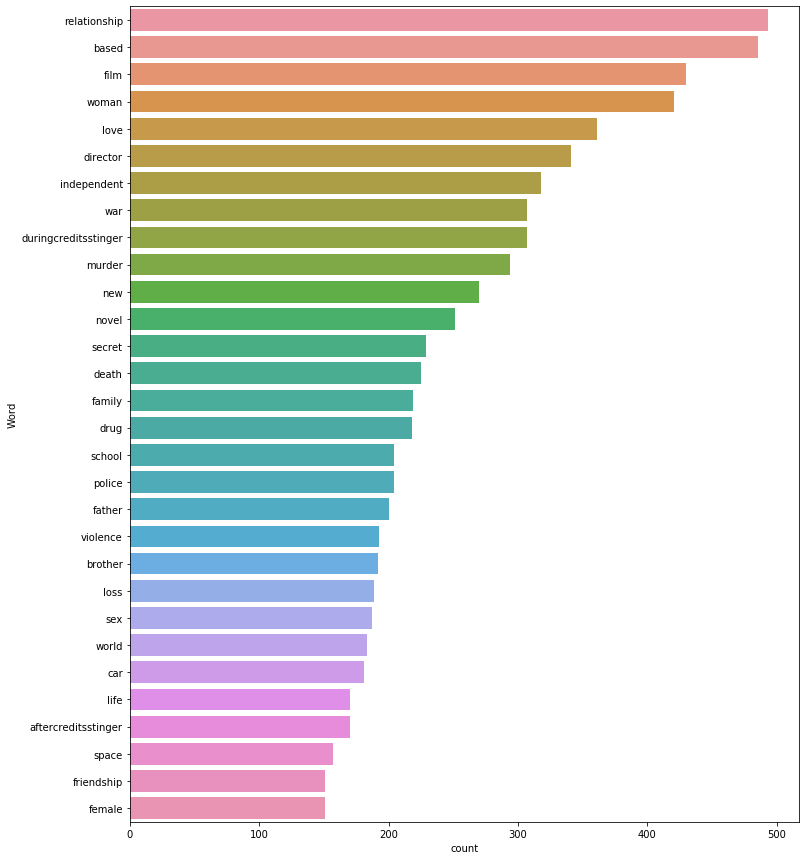

In [38]:
freq_words(new_fullmovie['keywords'],30)

In [39]:
#keywords_df=freq_words(new_fullmovie['keywords'],10) # only pick out top 10 keywords
#print(keywords_df)

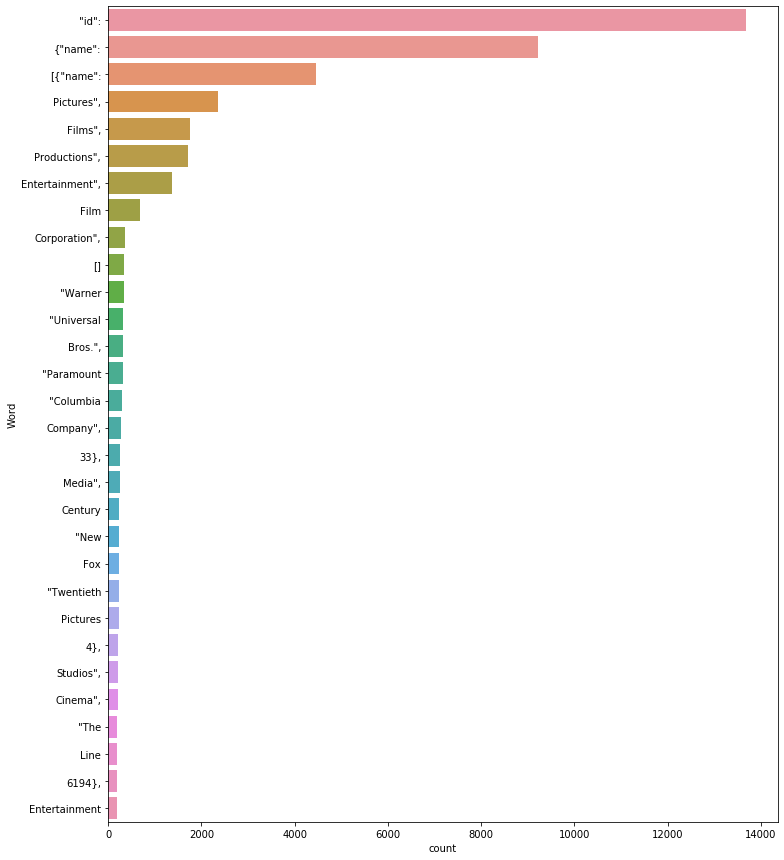

In [40]:
freq_words(new_fullmovie['production_companies'], 30)

In [41]:
# from the plot above to see,the popular words are mostly stop words, not meaningful for modeling 
# I decide to remove column "production_compaines"

new_fullmovie=new_fullmovie.drop(columns= ['production_companies'], inplace = False)

In [42]:
#remove column production compaines
new_fullmovie=new_fullmovie.drop(columns= ["production_compaines"], inplace = False)

In [43]:
# remove column overview
new_fullmovie=new_fullmovie.drop(columns=['overview','cast'],inplace=False)

In [44]:
#remove column tagline
new_fullmovie=new_fullmovie.drop(columns=['tagline'],inplace=False)

In [45]:
new_fullmovie.head(5)

budget                                    genres  \
0  237000000  Action|Adventure|Fantasy|Science Fiction   
1  300000000                  Adventure|Fantasy|Action   
2  245000000                    Action|Adventure|Crime   
3  250000000               Action|Crime|Drama|Thriller   
4  260000000          Action|Adventure|Science Fiction   

                                            keywords  popularity release_date  \
0  culture clash future space war space colony so...  150.437577   2009-12-10   
1  ocean drug abuse exotic island east india trad...  139.082615   2007-05-19   
2  spy based novel secret agent sequel mi british...  107.376788   2015-10-26   
3  dc comics crime fighter terrorist secret ident...  112.312950   2012-07-16   
4  based novel mars medallion space travel prince...   43.926995   2012-03-07   

      revenue  runtime  vote_average  vote_count  \
0  2787965087    162.0           7.2       11800   
1   961000000    169.0           6.9        4500   
2   880674609    148.0           6.3        4466   
3  1084939099    165.0           7.6        9106   
4   284139100    132.0           6.1        2124   

                                      title          actor1  
0                                    Avatar  SamWorthington  
1  Pirates of the Caribbean: At World's End      JohnnyDepp  
2                                   Spectre     DanielCraig  
3                     The Dark Knight Rises   ChristianBale  
4                               John Carter    TaylorKitsch

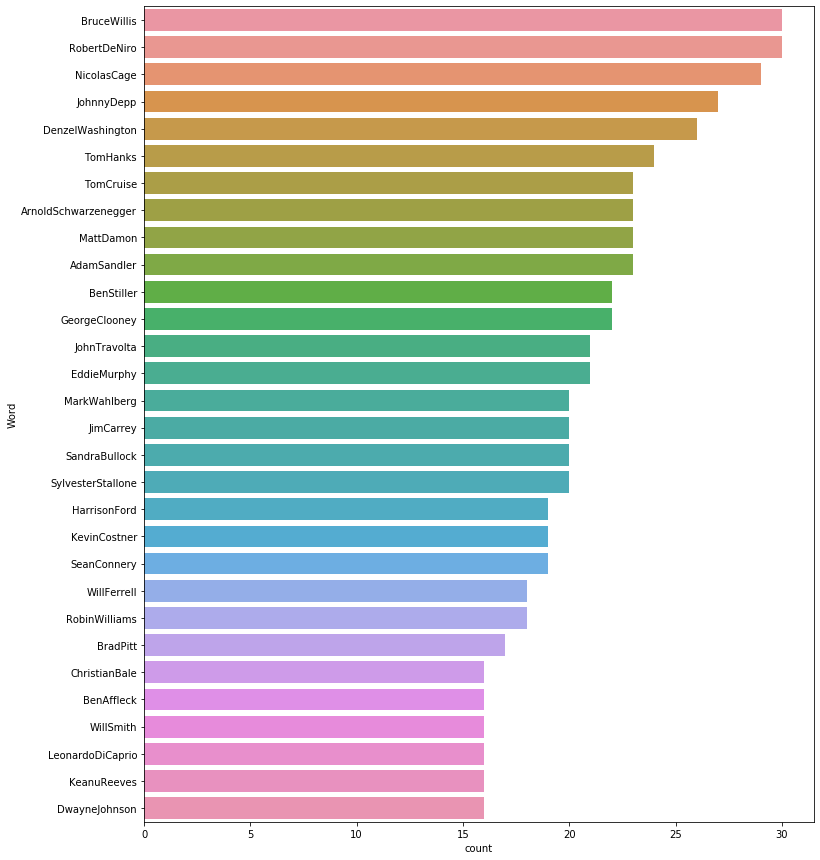

In [46]:
freq_words(new_fullmovie['actor1'],30) # only pick top 30 actors to reduce the complexity of computation 

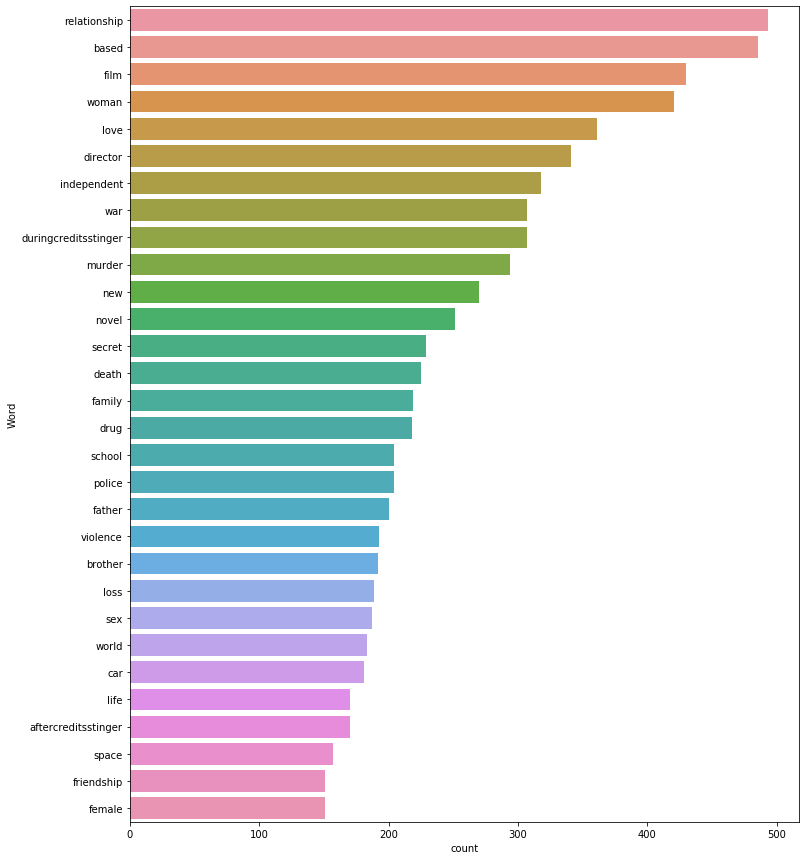

NoneType

In [47]:
type(freq_words(new_fullmovie['keywords'],30))

In [48]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(new_fullmovie['keywords'])

# transform target variable
keywords_new = multilabel_binarizer.transform(new_fullmovie['keywords'])
print(keywords_new)

[[1 1 1 ... 0 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 0 1 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [49]:
keywords_new.shape

(4803, 27)

In [50]:
keywords_new
keywords_new=pd.DataFrame(keywords_new)

In [51]:
new_fullmovie['release_date']= pd.to_datetime(new_fullmovie['release_date']) 

In [52]:
new_fullmovie['year']=new_fullmovie['release_date'].dt.year


In [53]:
new_fullmovie=new_fullmovie.drop(columns=['release_date'],inplace=False)

In [54]:
# it doesn't make sense to count the frequency of the title column, since almost every movie has unique name so I will drop this column here
new_fullmovie=new_fullmovie.drop(columns=['title'],inplace=False) 

In [55]:
new_fullmovie.head()

budget                                    genres  \
0  237000000  Action|Adventure|Fantasy|Science Fiction   
1  300000000                  Adventure|Fantasy|Action   
2  245000000                    Action|Adventure|Crime   
3  250000000               Action|Crime|Drama|Thriller   
4  260000000          Action|Adventure|Science Fiction   

                                            keywords  popularity     revenue  \
0  culture clash future space war space colony so...  150.437577  2787965087   
1  ocean drug abuse exotic island east india trad...  139.082615   961000000   
2  spy based novel secret agent sequel mi british...  107.376788   880674609   
3  dc comics crime fighter terrorist secret ident...  112.312950  1084939099   
4  based novel mars medallion space travel prince...   43.926995   284139100   

   runtime  vote_average  vote_count          actor1    year  
0    162.0           7.2       11800  SamWorthington  2009.0  
1    169.0           6.9        4500      JohnnyDepp  2007.0  
2    148.0           6.3        4466     DanielCraig  2015.0  
3    165.0           7.6        9106   ChristianBale  2012.0  
4    132.0           6.1        2124    TaylorKitsch  2012.0

In [56]:
genres = new_fullmovie['genres'].str.get_dummies()
genres.head()

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0       1          1          0       0      0            0      0       0   
1       1          1          0       0      0            0      0       0   
2       1          1          0       0      1            0      0       0   
3       1          0          0       0      1            0      1       0   
4       1          1          0       0      0            0      0       0   

   Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0        1        0        0       0      0        0        0   
1        1        0        0       0      0        0        0   
2        0        0        0       0      0        0        0   
3        0        0        0       0      0        0        0   
4        0        0        0       0      0        0        0   

   Science Fiction  TV Movie  Thriller  War  Western  
0                1         0         0    0        0  
1                0         0         0    0        0  
2                0         0         0    0        0  
3                0         0         1    0        0  
4                1         0         0    0        0

In [57]:
genres.sum().sort_values(ascending=False) 


Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
dtype: int64

In [58]:
# from the sorting result to see, the first a few genres have more rows than the rest of the genres

In [59]:
genres=genres[['Drama','Comedy','Thriller','Action','Romance']]# pick top 5 genres as dummy variables

In [60]:
genres.head(10)

Drama  Comedy  Thriller  Action  Romance
0      0       0         0       1        0
1      0       0         0       1        0
2      0       0         0       1        0
3      1       0         1       1        0
4      0       0         0       1        0
5      0       0         0       1        0
6      0       0         0       0        0
7      0       0         0       1        0
8      0       0         0       0        0
9      0       0         0       1        0

In [61]:
keywords = new_fullmovie['keywords'].str.get_dummies()

In [62]:
keywords.sum().sort_values(ascending=False) 

independent film                                                                                                                                                                                                                                                                              55
woman director                                                                                                                                                                                                                                                                                42
duringcreditsstinger                                                                                                                                                                                                                                                                          15
sport                                                                                                                                

In [63]:
keywords=keywords[['independent film','woman director','duringcreditsstinger','sport']] # pick top 4 categories from the keywords


In [64]:
actor = new_fullmovie['actor1'].str.get_dummies()
actor.sum().sort_values(ascending=False) 

RobertDeNiro               30
BruceWillis                30
NicolasCage                29
JohnnyDepp                 27
DenzelWashington           26
TomHanks                   24
AdamSandler                23
MattDamon                  23
ArnoldSchwarzenegger       23
TomCruise                  23
BenStiller                 22
GeorgeClooney              22
EddieMurphy                21
JohnTravolta               21
MarkWahlberg               20
JimCarrey                  20
SandraBullock              20
SylvesterStallone          20
HarrisonFord               19
SeanConnery                19
KevinCostner               19
WillFerrell                18
RobinWilliams              18
BradPitt                   17
WillSmith                  16
BenAffleck                 16
LeonardoDiCaprio           16
NicoleKidman               16
KeanuReeves                16
DwayneJohnson              16
                           ..
MarkAdams                   1
MarkAddy                    1
MarkBlankf

In [65]:
actor=actor[['RobertDeNiro','BruceWillis','NicolasCage','JohnnyDepp','DenzelWashington']]

In [66]:
new_fullmovie=new_fullmovie.drop(columns=['keywords','genres','actor1'],inplace=False)

In [67]:
new_fullmovie=new_fullmovie.drop(columns=['year'],inplace=False)

In [68]:
new_fullmovie['runtime']=new_fullmovie.fillna(new_fullmovie['runtime'].mean())

In [69]:
new_df1=pd.concat([new_fullmovie,genres],axis=1)

In [70]:
new_df1.head(10)

budget  popularity     revenue      runtime  vote_average  vote_count  \
0  237000000  150.437577  2787965087  237000000.0           7.2       11800   
1  300000000  139.082615   961000000  300000000.0           6.9        4500   
2  245000000  107.376788   880674609  245000000.0           6.3        4466   
3  250000000  112.312950  1084939099  250000000.0           7.6        9106   
4  260000000   43.926995   284139100  260000000.0           6.1        2124   
5  258000000  115.699814   890871626  258000000.0           5.9        3576   
6  260000000   48.681969   591794936  260000000.0           7.4        3330   
7  280000000  134.279229  1405403694  280000000.0           7.3        6767   
8  250000000   98.885637   933959197  250000000.0           7.4        5293   
9  250000000  155.790452   873260194  250000000.0           5.7        7004   

   Drama  Comedy  Thriller  Action  Romance  
0      0       0         0       1        0  
1      0       0         0       1        0  
2      0       0         0       1        0  
3      1       0         1       1        0  
4      0       0         0       1        0  
5      0       0         0       1        0  
6      0       0         0       0        0  
7      0       0         0       1        0  
8      0       0         0       0        0  
9      0       0         0       1        0

In [71]:
new_df2=pd.concat([new_df1,keywords],axis=1)
new_df3=pd.concat([new_df2,actor],axis=1)

In [72]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
popularity              4803 non-null float64
revenue                 4803 non-null int64
runtime                 4803 non-null float64
vote_average            4803 non-null float64
vote_count              4803 non-null int64
Drama                   4803 non-null int64
Comedy                  4803 non-null int64
Thriller                4803 non-null int64
Action                  4803 non-null int64
Romance                 4803 non-null int64
independent film        4803 non-null int64
woman director          4803 non-null int64
duringcreditsstinger    4803 non-null int64
sport                   4803 non-null int64
RobertDeNiro            4803 non-null int64
BruceWillis             4803 non-null int64
NicolasCage             4803 non-null int64
JohnnyDepp              4803 non-null int64
DenzelWashington        4803 non-null int64
dtypes:

In [73]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled_fullmovie = min_max_scaler.fit_transform(new_df3)
scaled_X = pd.DataFrame(scaled_fullmovie)

In [74]:
import numpy as np
from sklearn.decomposition import PCA
import sklearn

In [75]:
# apply PCA on the mixed dataset new_df3(mixing continious variables with dumm variables)

pca = PCA(n_components=4)

pca_components = pca.fit_transform(scaled_X)

In [76]:
pca

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [77]:
# extract how much percentage explained by PCA1,PCA2,PCA3,PCA4
print(pca.explained_variance_ratio_)
print((pca.explained_variance_ratio_).sum())

[0.29775719 0.26839051 0.1242984  0.11620985]
0.8066559530097973


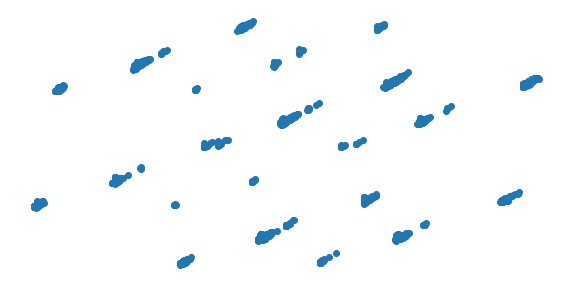

In [78]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [79]:
pca_components

array([[ 0.57564257,  0.57134303,  0.34389841, -0.75874964],
       [ 0.5660392 ,  0.56351969,  0.33874698, -0.74095701],
       [ 0.55311967,  0.55314574,  0.32449265, -0.72038132],
       ...,
       [-0.96484054, -0.3948899 ,  0.52296032,  0.35647138],
       [ 0.05853563,  0.21677807, -0.51930142, -0.28525985],
       [ 0.05840751,  0.21363699, -0.51838212, -0.28662121]])

In [80]:
# from the decreased dimension data, the clusters plot looks somehow strange

In [81]:
# apply DBSCAN to the new_df3

scaler = StandardScaler()
X_std = scaler.fit_transform(new_df3)
dbscan_cluster = DBSCAN(eps=3, min_samples=15)

clusters = dbscan_cluster.fit_predict(X_std)

In [82]:
clusters # cluster labels from DBSCAN

array([-1, -1,  0, ...,  0,  0,  0], dtype=int64)

In [83]:
# convert cluster array into a dataframe column 
new_df3['clusters']=pd.Series(clusters)

In [84]:
new_df3.groupby('clusters')['revenue'].nunique()

clusters
-1     148
 0    3095
 1      20
 2      19
 3      13
 4       9
Name: revenue, dtype: int64

In [85]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(20,18))

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             fontdict={'weight': 'bold', 'size': 28}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [86]:
# separate the dataframe new_df3 based on clusters

group_df = new_df3.groupby('clusters')    
[group_df.get_group(x) for x in group_df.groups]

[         budget  popularity     revenue      runtime  vote_average  \
 0     237000000  150.437577  2787965087  237000000.0           7.2   
 1     300000000  139.082615   961000000  300000000.0           6.9   
 3     250000000  112.312950  1084939099  250000000.0           7.6   
 7     280000000  134.279229  1405403694  280000000.0           7.3   
 12    200000000  145.847379  1065659812  200000000.0           7.0   
 13    255000000   49.046956    89289910  255000000.0           5.9   
 16    220000000  144.448633  1519557910  220000000.0           7.4   
 17    380000000  135.413856  1045713802  380000000.0           6.4   
 25    200000000  100.025899  1845034188  200000000.0           7.5   
 26    250000000  198.372395  1153304495  250000000.0           7.1   
 28    150000000  418.708552  1513528810  150000000.0           6.5   
 29    200000000   93.004993  1108561013  200000000.0           6.9   
 31    200000000   77.682080  1215439994  200000000.0           6.8   
 44   

In [87]:
# calculate mean of revenue of each cluster, mean of budget of each clusters,mean of vote_average of each cluster, 
# average vote_count of each cluster, mean popularity of each cluster

# also count the frequence of actors in each clusters

In [88]:
new_df3_copy=new_df3

new_df3_copy=new_df3_copy.groupby('clusters').agg({'Action':'sum','revenue':'mean','budget':'mean','vote_average':'mean','popularity':'mean'}).rename(columns={'RobertDeNiro':'RobertDeniro_sum', 'Action':'Action_sum','revenue':'revenue_mean','budget':'budget_mean','vote_average':'vote_mean','popularity':'pop_mean'})
print(new_df3_copy)

          Action_sum  revenue_mean   budget_mean  vote_mean   pop_mean
clusters                                                              
-1                75  2.872179e+08  7.432919e+07   6.145349  67.840408
 0              1072  7.599335e+07  2.776505e+07   6.088800  20.051576
 1                 4  1.052496e+08  4.815000e+07   6.780000  25.672066
 2                 0  6.513053e+07  3.033182e+07   6.800000  25.713113
 3                 3  1.156698e+06  1.410154e+06   5.825000   2.341928
 4                 0  3.467302e+06  1.956010e+06   5.837838   3.404520


In [89]:
new_df3_copy

Action_sum  revenue_mean   budget_mean  vote_mean   pop_mean
clusters                                                              
-1                75  2.872179e+08  7.432919e+07   6.145349  67.840408
 0              1072  7.599335e+07  2.776505e+07   6.088800  20.051576
 1                 4  1.052496e+08  4.815000e+07   6.780000  25.672066
 2                 0  6.513053e+07  3.033182e+07   6.800000  25.713113
 3                 3  1.156698e+06  1.410154e+06   5.825000   2.341928
 4                 0  3.467302e+06  1.956010e+06   5.837838   3.404520

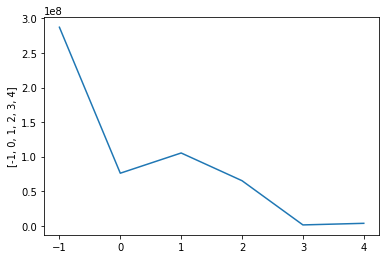

In [90]:
plt.plot(new_df3_copy['revenue_mean'])
plt.ylabel([-1,0,1,2,3,4])
plt.show()

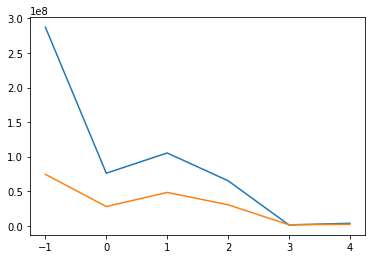

In [91]:
plt.plot(new_df3_copy['revenue_mean'])
plt.plot(new_df3_copy['budget_mean'])

In [92]:
# since this DBSCAN model has mixed type data, continious type and categrocial type(I converted to dummy variables),so it's highly likely 
# this DBSCAB model can't clustering in a proper way. so Let's focus on continuous variable now.

In [93]:
# value counts  Sum up all columns
# y column is original words, maybe 5 clusters will be enough
# sort to top 5 labels
# hard clustering maybe 5 labels
# GMM soft clustering maybe using 10 labels
# pick the higher probability one,GMM, get 5 distinct clusters,get the percentage of each cluster,
# then hard clustering after soft clustering

In [94]:
str_list=[]
for col, val in new_fullmovie.iteritems():
    if type(val[1])==str:
        str_list.append(col)
        #print(val[1])
num_list=new_fullmovie.columns.difference(str_list)

In [95]:
# Let's first focus on the numeric features only, apply PCA, k_means, GMM to see the result

In [96]:
num_df=new_fullmovie[num_list]
num_df.head()

budget  popularity     revenue      runtime  vote_average  vote_count
0  237000000  150.437577  2787965087  237000000.0           7.2       11800
1  300000000  139.082615   961000000  300000000.0           6.9        4500
2  245000000  107.376788   880674609  245000000.0           6.3        4466
3  250000000  112.312950  1084939099  250000000.0           7.6        9106
4  260000000   43.926995   284139100  260000000.0           6.1        2124

In [97]:
# clean out the zeroe values in the revenue and budget,get rid the whole row if it has revenue=0 and budget=0,
# beacuse 0 value in revenue will impact the accuracy of model clustering

In [98]:
index = num_df[ num_df['revenue'] == 0 ].index
 
num_df.drop(index , inplace=True)

In [99]:
index # for revenue ==0 rows

Int64Index([  83,  135,  265,  309,  376,  406,  433,  453,  463,  467,
            ...
            4790, 4791, 4793, 4794, 4795, 4797, 4799, 4800, 4801, 4802],
           dtype='int64', length=1427)

In [100]:
index1=num_df[num_df['budget']==0].index
num_df.drop(index1, inplace=True)

In [101]:
index1 #for revenue ==1 rows

Int64Index([ 321,  359,  409,  475,  489,  542,  691,  766,  847,  882,
            ...
            4533, 4549, 4565, 4576, 4603, 4605, 4630, 4677, 4766, 4775],
           dtype='int64', length=147)

In [102]:
num_df.head(10)

budget  popularity     revenue      runtime  vote_average  vote_count
0  237000000  150.437577  2787965087  237000000.0           7.2       11800
1  300000000  139.082615   961000000  300000000.0           6.9        4500
2  245000000  107.376788   880674609  245000000.0           6.3        4466
3  250000000  112.312950  1084939099  250000000.0           7.6        9106
4  260000000   43.926995   284139100  260000000.0           6.1        2124
5  258000000  115.699814   890871626  258000000.0           5.9        3576
6  260000000   48.681969   591794936  260000000.0           7.4        3330
7  280000000  134.279229  1405403694  280000000.0           7.3        6767
8  250000000   98.885637   933959197  250000000.0           7.4        5293
9  250000000  155.790452   873260194  250000000.0           5.7        7004

In [103]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 6 columns):
budget          3229 non-null int64
popularity      3229 non-null float64
revenue         3229 non-null int64
runtime         3229 non-null float64
vote_average    3229 non-null float64
vote_count      3229 non-null int64
dtypes: float64(3), int64(3)
memory usage: 176.6 KB


In [104]:
# PCA, rand index, PCA down to 2 variables, visualiza it, and to see if there is clusters

In [105]:
num_df.isnull().sum() * 100 / len(num_df)

budget          0.0
popularity      0.0
revenue         0.0
runtime         0.0
vote_average    0.0
vote_count      0.0
dtype: float64

In [106]:
num_df=num_df.fillna(num_df.mean()) # fill in NaN 

In [107]:
num_df.isnull().sum()*100/num_df.isnull().count()

budget          0.0
popularity      0.0
revenue         0.0
runtime         0.0
vote_average    0.0
vote_count      0.0
dtype: float64

In [108]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(num_df)

In [109]:
# apply kmean clustering on the standardized data
k_means = KMeans(n_clusters=8, random_state=120)


k_means.fit(scaled_X)
y_pred = k_means.predict(scaled_X)
print(k_means.labels_)
print(y_pred)

[3 3 3 ... 4 4 4]
[3 3 3 ... 4 4 4]


In [110]:
# predict, take label pin back the label to orginal data, and groupby onthe label,
#look at the mean of each group, differences between clusters based on clusters
# check if clusters has difference means of budget, and revenue difference, check the groups.

In [111]:
kmean_label=pd.Series(y_pred)

In [112]:
num_df['kmeans_label']=kmean_label

In [113]:
kmean_result=num_df.groupby('kmeans_label').mean()
print(kmean_result)

                    budget  popularity       revenue       runtime  \
kmeans_label                                                         
0.0           2.524219e+07   24.509951  7.838727e+07  2.524219e+07   
1.0           1.362069e+08   55.046979  3.536509e+08  1.362069e+08   
2.0           6.634453e+07   36.909557  1.751914e+08  6.634453e+07   
3.0           1.700562e+08   90.524603  6.681671e+08  1.700562e+08   
4.0           2.302932e+07   22.501513  6.851905e+07  2.302932e+07   
5.0           4.715055e+07   26.956749  1.251879e+08  4.715055e+07   
6.0           1.375000e+08  190.807921  6.398175e+08  1.375000e+08   
7.0           3.298644e+07   25.974525  9.428466e+07  3.298644e+07   

              vote_average   vote_count  
kmeans_label                             
0.0               6.264297   744.192733  
1.0               6.200000  2341.487310  
2.0               6.225000  1221.486014  
3.0               6.697753  4324.044944  
4.0               6.285831   680.941368  
5.0  

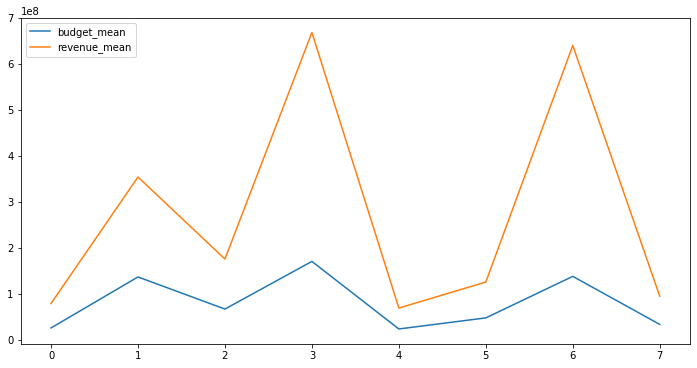

In [114]:
# plot each columns in the kmeans_result
fig=plt.figure(figsize=(12,6))
plt.plot(kmean_result['budget'],label='budget_mean')
plt.plot(kmean_result['revenue'],label='revenue_mean')
#plt.plot(kmean_result['runtime'],label='runtime_mean')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

In [115]:
# from the plot above it's clear to see, cluster 3 cluster 6 are interesting clusters. movies in the cluster 3 and cluster 6 have extreme high revenue and budgets are low.
# this means movies in the cluster3 and cluster6 are excellent profit movies, big bucks earner. It's worhty digging deep into these two clusters to find out what features makes these movies big bucks movies.

In [116]:
#num_df # just to check dataset num_df still keep the original index, so in this way, it's easy to locte the rows belongs to different clusters

In [117]:
# locate indexes of those movies in cluster 3
# locate the rows from original dataset which is fullmovie not the continuous data
index_cluster3=num_df[num_df['kmeans_label']==3].index
print(index_cluster3)
print(type(index_cluster3))
kmean_cluster3_df=movie_df_complete.iloc[index_cluster3]

Int64Index([  0,   1,   2,   3,   5,   6,   7,   8,   9,  12,  14,  16,  17,
             18,  19,  20,  22,  25,  26,  29,  30,  31,  32,  34,  36,  38,
             42,  44,  45,  46,  47,  52,  55,  57,  59,  64,  65,  66,  68,
             72,  74,  77,  78,  79,  81,  82,  84,  87,  95,  97, 101, 107,
            112, 113, 115, 117, 118, 123, 124, 125, 128, 133, 151, 157, 158,
            167, 174, 180, 181, 189, 195, 197, 198, 214, 227, 229, 231, 237,
            260, 267, 273, 274, 284, 323, 324, 325, 417, 488, 544],
           dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>


In [118]:
print(kmean_cluster3_df)

        budget                                        genres  \
0    237000000      Action|Adventure|Fantasy|Science Fiction   
1    300000000                      Adventure|Fantasy|Action   
2    245000000                        Action|Adventure|Crime   
3    250000000                   Action|Crime|Drama|Thriller   
5    258000000                      Fantasy|Action|Adventure   
6    260000000                              Animation|Family   
7    280000000              Action|Adventure|Science Fiction   
8    250000000                      Adventure|Fantasy|Family   
9    250000000                      Action|Adventure|Fantasy   
12   200000000                      Adventure|Fantasy|Action   
14   225000000      Action|Adventure|Fantasy|Science Fiction   
16   220000000              Science Fiction|Action|Adventure   
17   380000000                      Adventure|Action|Fantasy   
18   225000000                 Action|Comedy|Science Fiction   
19   250000000                      Acti

In [119]:
# use same method for cluster 6 in this model
index_cluster6=num_df[num_df['kmeans_label']==6].index
print(index_cluster6)
type(index_cluster6)
kmean_cluster6_df=movie_df_complete.iloc[index_cluster6]

Int64Index([28, 93, 94, 126, 525, 747], dtype='int64')


In [120]:
print(index_cluster3)
print(index_cluster6)

Int64Index([  0,   1,   2,   3,   5,   6,   7,   8,   9,  12,  14,  16,  17,
             18,  19,  20,  22,  25,  26,  29,  30,  31,  32,  34,  36,  38,
             42,  44,  45,  46,  47,  52,  55,  57,  59,  64,  65,  66,  68,
             72,  74,  77,  78,  79,  81,  82,  84,  87,  95,  97, 101, 107,
            112, 113, 115, 117, 118, 123, 124, 125, 128, 133, 151, 157, 158,
            167, 174, 180, 181, 189, 195, 197, 198, 214, 227, 229, 231, 237,
            260, 267, 273, 274, 284, 323, 324, 325, 417, 488, 544],
           dtype='int64')
Int64Index([28, 93, 94, 126, 525, 747], dtype='int64')


In [157]:
index_cluster3=index_cluster3.tolist()
index_cluster6=index_cluster6.tolist()

In [159]:
km_list1=index_cluster3+index_cluster6
print(km_list1)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 12, 14, 16, 17, 18, 19, 20, 22, 25, 26, 29, 30, 31, 32, 34, 36, 38, 42, 44, 45, 46, 47, 52, 55, 57, 59, 64, 65, 66, 68, 72, 74, 77, 78, 79, 81, 82, 84, 87, 95, 97, 101, 107, 112, 113, 115, 117, 118, 123, 124, 125, 128, 133, 151, 157, 158, 167, 174, 180, 181, 189, 195, 197, 198, 214, 227, 229, 231, 237, 260, 267, 273, 274, 284, 323, 324, 325, 417, 488, 544, 28, 93, 94, 126, 525, 747]


In [121]:
print(kmean_cluster6_df)

        budget                                     genres  \
28   150000000  Action|Adventure|Science Fiction|Thriller   
93   200000000            Action|Thriller|Science Fiction   
94   170000000           Action|Science Fiction|Adventure   
126  170000000                   Action|Adventure|Fantasy   
525   75000000             Animation|Action|Comedy|Family   
747   60000000                Crime|Drama|Action|Thriller   

                                              keywords  \
28   monster dna tyrannosaurus rex velociraptor isl...   
93   saving world artificial intelligence man vs ma...   
94   marvel comic spaceship space outer space orpha...   
126  marvel comic superhero based comic book hostil...   
525  fish hero mission murder threat death secret l...   
747                               los angeles gangster   

                                              overview  popularity  \
28   Twenty-two years after the events of Jurassic ...  418.708552   
93   It's been 10 years s

In [122]:
type(kmean_cluster6_df)

pandas.core.frame.DataFrame

In [123]:
index_cluster6

Int64Index([28, 93, 94, 126, 525, 747], dtype='int64')

In [124]:
# combine indexes from cluster 3 and 6
#kmean_list=index_cluster3 +index_cluster6

# for i in index_cluster6 : 
#     index_cluster3.append(i) 

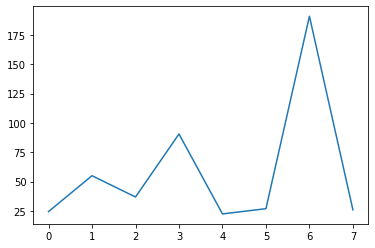

In [125]:
plt.plot(kmean_result['popularity'])

In [126]:
# the popularity plot exactly support the result from the first plot having budget and revenue features

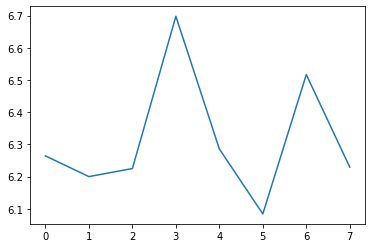

In [127]:
plt.plot(kmean_result['vote_average'])

In [128]:
# the plot here with vote_average also support the result from first plot with revenue and budget in it.

In [129]:
#num_df

In [130]:
num_df.groupby("kmeans_label").count()

budget  popularity  revenue  runtime  vote_average  vote_count
kmeans_label                                                                
0.0              633         633      633      633           633         633
1.0              197         197      197      197           197         197
2.0              572         572      572      572           572         572
3.0               89          89       89       89            89          89
4.0              614         614      614      614           614         614
5.0              183         183      183      183           183         183
6.0                6           6        6        6             6           6
7.0              278         278      278      278           278         278

In [131]:
# maybe try less clusters, n_cluster=5 or 6
# here apply KMeans with n =5

In [132]:
# remove the labels from previous model
num_df=num_df.drop(['kmeans_label'],axis=1,inplace=False)

In [133]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(num_df)

In [134]:
# apply kmean clustering on the standardized data
k_means = KMeans(n_clusters=5, random_state=120)


k_means.fit(scaled_X)
y_pred = k_means.predict(scaled_X)
print(k_means.labels_)
print(y_pred)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [135]:
kmean_label=pd.Series(y_pred)

In [136]:
num_df['kmeans5_label']=kmean_label

In [137]:
kmean5_result=num_df.groupby('kmeans5_label').mean()
print(kmean5_result)

                     budget  popularity       revenue       runtime  \
kmeans5_label                                                         
0.0            2.605890e+07   22.922307  7.706488e+07  2.605890e+07   
1.0            1.584533e+08   77.249580  5.584720e+08  1.584533e+08   
2.0            3.542400e+07   27.331771  9.738224e+07  3.542400e+07   
3.0            9.092721e+07   43.776353  2.399124e+08  9.092721e+07   
4.0            1.375000e+08  190.807921  6.398175e+08  1.375000e+08   

               vote_average   vote_count  
kmeans5_label                             
0.0                6.243149   719.793456  
1.0                6.560000  3645.886667  
2.0                6.260957   830.951064  
3.0                6.170683  1619.012048  
4.0                6.516667  4772.833333  


In [138]:
num_df

budget  popularity     revenue      runtime  vote_average  \
0     237000000  150.437577  2787965087  237000000.0           7.2   
1     300000000  139.082615   961000000  300000000.0           6.9   
2     245000000  107.376788   880674609  245000000.0           6.3   
3     250000000  112.312950  1084939099  250000000.0           7.6   
4     260000000   43.926995   284139100  260000000.0           6.1   
5     258000000  115.699814   890871626  258000000.0           5.9   
6     260000000   48.681969   591794936  260000000.0           7.4   
7     280000000  134.279229  1405403694  280000000.0           7.3   
8     250000000   98.885637   933959197  250000000.0           7.4   
9     250000000  155.790452   873260194  250000000.0           5.7   
10    270000000   57.925623   391081192  270000000.0           5.4   
11    200000000  107.928811   586090727  200000000.0           6.1   
12    200000000  145.847379  1065659812  200000000.0           7.0   
13    255000000   49.046956    89289910  255000000.0           5.9   
14    225000000   99.398009   662845518  225000000.0           6.5   
15    225000000   53.978602   419651413  225000000.0           6.3   
16    220000000  144.448633  1519557910  220000000.0           7.4   
17    380000000  135.413856  1045713802  380000000.0           6.4   
18    225000000   52.035179   624026776  225000000.0           6.2   
19    250000000  120.965743   956019788  250000000.0           7.1   
20    215000000   89.866276   752215857  215000000.0           6.5   
21    200000000   37.668301   310669540  200000000.0           6.2   
22    250000000   94.370564   958400000  250000000.0           7.6   
23    180000000   42.990906   372234864  180000000.0           5.8   
24    207000000   61.226010   550000000  207000000.0           6.6   
25    200000000  100.025899  1845034188  200000000.0           7.5   
26    250000000  198.372395  1153304495  250000000.0           7.1   
27    209000000   64.928382   303025485  209000000.0           5.5   
28    150000000  418.708552  1513528810  150000000.0           6.5   
29    200000000   93.004993  1108561013  200000000.0           6.9   
...         ...         ...         ...          ...           ...   
4666     225000    0.126676      111300     225000.0           6.9   
4668     100000    1.183892    27000000     100000.0           4.3   
4669     210000    2.043661     5000000     210000.0           6.7   
4670     400000   33.142185   100000000     400000.0           6.6   
4671     200000   13.971674     4505922     200000.0           6.8   
4672     200000   38.771062    14500000     200000.0           7.6   
4673     200000    0.622752     2200000     200000.0           5.1   
4675     200000    0.616283     2295733     200000.0           6.5   
4695     180000    7.072118      900000     180000.0           7.8   
4696       8000    1.041254      469947       8000.0           7.4   
4700     100000   25.402697     1776935     100000.0           6.8   
4701     150000    0.132878    15200000     150000.0           4.6   
4703     150000    8.570328     2891288     150000.0           5.5   
4704     160000   19.052179    20710513     160000.0           7.3   
4713     160000    3.284903     6706368     160000.0           7.4   
4717     125000   12.833247     3200000     125000.0           6.5   
4720    8500000    9.452808    15861566    8500000.0           6.5   
4722     100000    4.563698    10178331     100000.0           6.6   
4723     100000   18.045782    42664410     100000.0           4.9   
4724      10000   20.399578     7000000      10000.0           7.5   
4738      60000   27.788067     3221152      60000.0           7.1   
4742      65000   10.400603    28575078      65000.0           6.6   
4752      65000    2.380332      416498      65000.0           5.6   
4758    4000000   27.662696      600896    4000000.0           5.8   
4772      31192    1.330379       10000      31192.0           6.3   
4773      27000   1

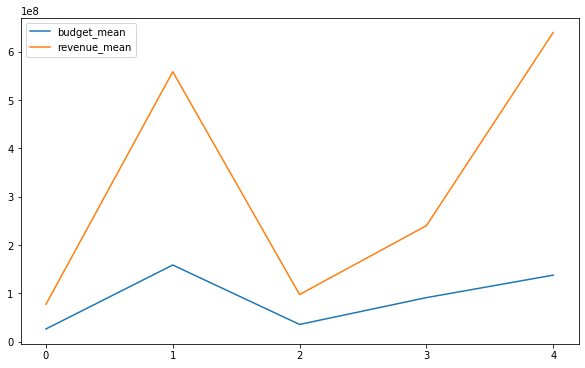

In [139]:
# plot each columns in the kmeans_result
import matplotlib.ticker as mticker
fig=plt.figure(figsize=(10,6))
x=[0,1,2,3,4]
plt.plot(x,kmean5_result['budget'],label='budget_mean')
plt.plot(x,kmean5_result['revenue'],label='revenue_mean')
#plt.plot(kmean5_result['runtime'],label='runtime_mean')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

In [140]:
# From the plot above it shows cluster 1 and cluster 4 has high revenue_mean and the budget_mean are also slightly higher than other cluters
# Comparing the revenue_mean among all clusters, cluster 1 and 4 are much higher. It's worth to check in details about these two clusters

In [141]:
# find index for cluster 1 and cluster 4
index_clusters_newkmean=num_df[num_df['kmeans5_label']==1].index
print(index_clusters_newkmean)
type(index_clusters_newkmean)
kmean_cluster_new=movie_df_complete.iloc[index_clusters_newkmean]

index_clusters_newkmean1=num_df[num_df['kmeans5_label']==4].index
print(index_clusters_newkmean1)
type(index_clusters_newkmean1)
kmean_cluster_new=movie_df_complete.iloc[index_clusters_newkmean1]

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            486, 488, 544, 545, 550, 591, 605, 611, 636, 664],
           dtype='int64', length=150)
Int64Index([28, 93, 94, 126, 525, 747], dtype='int64')


In [160]:
index_clusters_newkmean=index_clusters_newkmean.tolist()
index_clusters_newkmean1=index_clusters_newkmean1.tolist()

In [162]:
kmeans_list2=index_clusters_newkmean+index_clusters_newkmean1
print(kmeans_list2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 51, 52, 53, 55, 56, 57, 59, 63, 64, 65, 66, 68, 72, 74, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 91, 92, 95, 97, 99, 100, 101, 105, 107, 110, 112, 113, 114, 115, 116, 117, 118, 122, 123, 124, 125, 128, 133, 143, 144, 147, 148, 151, 156, 157, 158, 167, 170, 174, 179, 180, 181, 189, 195, 197, 198, 199, 214, 218, 227, 228, 229, 231, 232, 236, 237, 260, 267, 271, 273, 274, 276, 284, 295, 320, 323, 324, 325, 330, 334, 337, 343, 351, 417, 429, 476, 486, 488, 544, 545, 550, 591, 605, 611, 636, 664, 28, 93, 94, 126, 525, 747]


In [164]:
# comparing the big revenue movie clusters from two kmeans model
# print out the 
print(set(km_list1)&set(kmeans_list2))

{0,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 12,
 14,
 16,
 17,
 18,
 19,
 20,
 22,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 34,
 36,
 38,
 42,
 44,
 45,
 46,
 47,
 52,
 55,
 57,
 59,
 64,
 65,
 66,
 68,
 72,
 74,
 77,
 78,
 79,
 81,
 82,
 84,
 87,
 93,
 94,
 95,
 97,
 101,
 107,
 112,
 113,
 115,
 117,
 118,
 123,
 124,
 125,
 126,
 128,
 133,
 151,
 157,
 158,
 167,
 174,
 180,
 181,
 189,
 195,
 197,
 198,
 214,
 227,
 229,
 231,
 237,
 260,
 267,
 273,
 274,
 284,
 323,
 324,
 325,
 417,
 488,
 525,
 544,
 747}

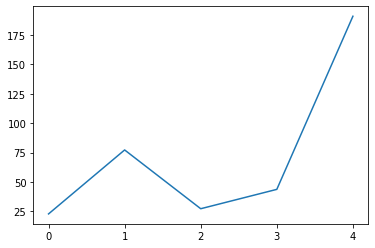

In [142]:
plt.plot(kmean5_result['popularity'])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

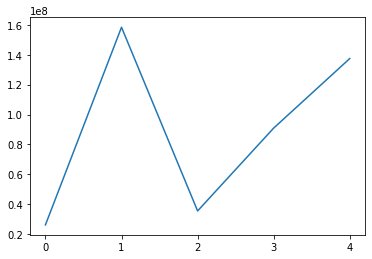

In [143]:
plt.plot(kmean5_result['runtime'])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

In [144]:
# The runtime plot shows the same trend with the revenue & budget plot.Cluster 1 and cluster 4 has the higher runtime.

In [145]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

In [146]:
pca = PCA(n_components=2).fit_transform(scaled_X)

plt.figure(figsize=(18,15))

for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1],str(y_pred[i]),fontdict={'weight':'bold','size':45})
         
plt.xticks([])
plt.yticks([])
plt.show()

In [147]:
# from the PCA plot, it didn't show any signifanct pattern. Because the PCA plot only show plot 2D, so it's not enough to show by 2D plot

In [148]:
pca

array([[15.58652032,  0.58828037],
       [ 9.78485075, -2.33887064],
       [ 8.01994096, -2.1620474 ],
       ...,
       [-1.57278312,  1.17607405],
       [-1.20502459,  1.0796513 ],
       [-1.4733799 ,  0.66368745]])

In [149]:
# kmeans k=3
k_means = KMeans(n_clusters=3, random_state=120)


k_means.fit(scaled_X)
y_pred = k_means.predict(scaled_X)
print(k_means.labels_)
print(y_pred)

[1 1 1 ... 2 2 2]
[1 1 1 ... 2 2 2]


In [150]:
kmean_label_4=pd.Series(y_pred)
num_df['kmeans_label_4']=kmean_label_4

In [151]:
#num_df.drop(['gmm_label'],axis=1)

In [167]:
km_groupby=num_df.groupby(['kmeans_label_4']).mean()
print(km_groupby)

                      budget  popularity       revenue       runtime  \
kmeans_label_4                                                         
0.0             4.548754e+07   30.991477  1.244444e+08  4.548754e+07   
1.0             1.341555e+08   63.213282  4.167726e+08  1.341555e+08   
2.0             2.890247e+07   23.769321  8.391517e+07  2.890247e+07   

                vote_average   vote_count  kmeans5_label  
kmeans_label_4                                            
0.0                 6.253018   975.745407       2.166229  
1.0                 6.322917  2768.571429       2.125000  
2.0                 6.235590   751.439158       0.327539  


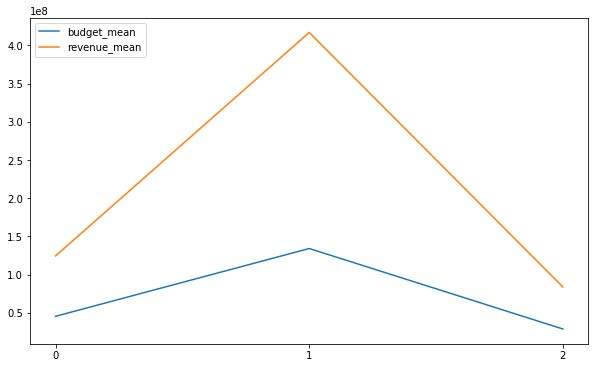

In [168]:
import matplotlib.ticker as mticker
fig=plt.figure(figsize=(10,6))
x=[0,1,2]
plt.plot(x,km_groupby['budget'],label='budget_mean')
plt.plot(x,km_groupby['revenue'],label='revenue_mean')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

In [169]:
# apply GMM on the numeric data
from sklearn.mixture import GaussianMixture
gmm_cluster=GaussianMixture(n_components=8,random_state=105)
clusters=gmm_cluster.fit_predict(scaled_X)

In [170]:
clusters

array([4, 7, 7, ..., 0, 1, 3], dtype=int64)

In [171]:
# attach this new cluster labels back to num_df to check by groupby
GMM_label=pd.Series(clusters)

In [172]:
num_df=num_df.drop(['kmeans5_label'],axis=1)

In [173]:
num_df['gmm_label']=GMM_label
gmm_result=num_df.groupby('gmm_label').mean()

In [174]:
gmm_result

budget  popularity       revenue       runtime  vote_average  \
gmm_label                                                                       
0.0        2.214412e+07   22.027644  6.637935e+07  2.214412e+07      6.247059   
1.0        2.386069e+07   23.668483  7.172122e+07  2.386069e+07      6.250333   
2.0        9.531418e+07   45.136960  2.420346e+08  9.531418e+07      6.196262   
3.0        2.200856e+07   23.808810  7.565845e+07  2.200856e+07      6.352292   
4.0        1.632000e+08  235.130445  9.826106e+08  1.632000e+08      7.000000   
5.0        5.077966e+07   31.499831  1.328572e+08  5.077966e+07      6.214871   
6.0        4.077527e+07   25.108211  1.040840e+08  4.077527e+07      6.128269   
7.0        1.187213e+08   56.711938  4.019605e+08  1.187213e+08      6.385652   

            vote_count  kmeans_label_4  
gmm_label                               
0.0         621.391003        0.865052  
1.0         726.320000        1.646667  
2.0        1612.700935        0.869159  
3.0         740.654167        1.037500  
4.0        7508.200000        1.000000  
5.0        1021.072838        0.485584  
6.0         797.618375        1.469965  
7.0        2706.417391        1.108696

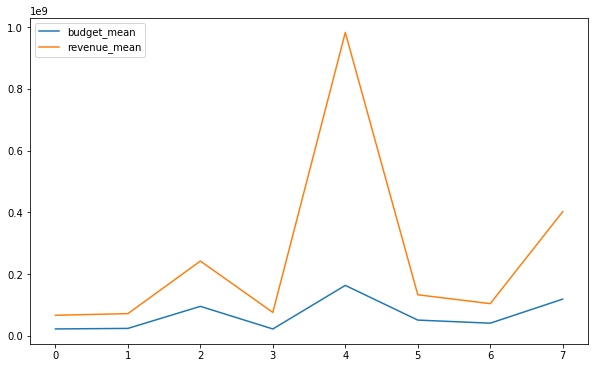

In [175]:

fig=plt.figure(figsize=(10,6))
x=[0,1,2,3,4,5,6,7]
plt.plot(x,gmm_result['budget'],label='budget_mean')
plt.plot(x,gmm_result['revenue'],label='revenue_mean')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(0,1),loc='upper left',ncol=1)
plt.show()


In [176]:
index_cluster4_gmm=num_df[num_df['gmm_label']==4].index
print(index_cluster4_gmm)
type(index_cluster4_gmm)
gmm_cluster4_df=movie_df_complete.iloc[index_cluster4_gmm]



Int64Index([0, 16, 28, 65, 93, 94, 95, 126, 525, 747], dtype='int64')


In [180]:
index_cluster4_gmm=index_cluster4_gmm.tolist()

In [181]:
print(index_cluster4_gmm,km_list1) # comparing the cluster with high revenue from first kmeans model and GMM model cluster 4

[0, 16, 28, 65, 93, 94, 95, 126, 525, 747] [0, 1, 2, 3, 5, 6, 7, 8, 9, 12, 14, 16, 17, 18, 19, 20, 22, 25, 26, 29, 30, 31, 32, 34, 36, 38, 42, 44, 45, 46, 47, 52, 55, 57, 59, 64, 65, 66, 68, 72, 74, 77, 78, 79, 81, 82, 84, 87, 95, 97, 101, 107, 112, 113, 115, 117, 118, 123, 124, 125, 128, 133, 151, 157, 158, 167, 174, 180, 181, 189, 195, 197, 198, 214, 227, 229, 231, 237, 260, 267, 273, 274, 284, 323, 324, 325, 417, 488, 544, 28, 93, 94, 126, 525, 747]


In [182]:
print(index_cluster4_gmm,kmeans_list2) # compare cluster with high revenue from second kmeans model and GMM model.

[0, 16, 28, 65, 93, 94, 95, 126, 525, 747] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 51, 52, 53, 55, 56, 57, 59, 63, 64, 65, 66, 68, 72, 74, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 91, 92, 95, 97, 99, 100, 101, 105, 107, 110, 112, 113, 114, 115, 116, 117, 118, 122, 123, 124, 125, 128, 133, 143, 144, 147, 148, 151, 156, 157, 158, 167, 170, 174, 179, 180, 181, 189, 195, 197, 198, 199, 214, 218, 227, 228, 229, 231, 232, 236, 237, 260, 267, 271, 273, 274, 276, 284, 295, 320, 323, 324, 325, 330, 334, 337, 343, 351, 417, 429, 476, 486, 488, 544, 545, 550, 591, 605, 611, 636, 664, 28, 93, 94, 126, 525, 747]


In [177]:
gmm_cluster4_df

budget                                     genres  \
0    237000000   Action|Adventure|Fantasy|Science Fiction   
16   220000000           Science Fiction|Action|Adventure   
28   150000000  Action|Adventure|Science Fiction|Thriller   
65   185000000                Drama|Action|Crime|Thriller   
93   200000000            Action|Thriller|Science Fiction   
94   170000000           Action|Science Fiction|Adventure   
95   165000000            Adventure|Drama|Science Fiction   
126  170000000                   Action|Adventure|Fantasy   
525   75000000             Animation|Action|Comedy|Family   
747   60000000                Crime|Drama|Action|Thriller   

                                              keywords  \
0    culture clash future space war space colony so...   
16   new york shield marvel comic superhero based c...   
28   monster dna tyrannosaurus rex velociraptor isl...   
65   dc comics crime fighter secret identity scarec...   
93   saving world artificial intelligence man vs ma...   
94   marvel comic spaceship space outer space orpha...   
95   saving world artificial intelligence father so...   
126  marvel comic superhero based comic book hostil...   
525  fish hero mission murder threat death secret l...   
747                               los angeles gangster   

                                              overview  popularity  \
0    In the 22nd century, a paraplegic Marine is di...  150.437577   
16   When an unexpected enemy emerges and threatens...  144.448633   
28   Twenty-two years after the events of Jurassic ...  418.708552   
65   Batman raises the stakes in his war on crime. ...  187.322927   
93   It's been 10 years since John Connor saved Ear...   69.405188   
94   Light years from Earth, 26 years after being a...  481.098624   
95   Interstellar chronicles the adventures of a gr...  724.247784   
126  Thor fights to restore order across the cosmos...   99.499595   
525  Oscar is a small fish whose big aspirations of...   47.094369   
747  Los Angeles, 1949. Ruthless, Brooklyn-born mob...   29.041198   

                                  production_companies release_date  \
0    [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10   
16   [{"name": "Paramount Pictures", "id": 4}, {"na...   2012-04-25   
28   [{"name": "Universal Studios", "id": 13}, {"na...   2015-06-09   
65   [{"name": "DC Comics", "id": 429}, {"name": "L...   2008-07-16   
93   [{"name": "Columbia Pictures", "id": 5}, {"nam...   2003-07-02   
94   [{"name": "Marvel Studios", "id": 420}, {"name...   2014-07-30   
95   [{"name": "Paramount Pictures", "id": 4}, {"na...   2014-11-05   
126            [{"name": "Marvel Studios", "id": 420}]   2013-10-29   
525  [{"name": "DreamWorks SKG", "id": 27}, {"name"...   2004-09-20   
747  [{"name": "Village Roadshow Pictures", "id": 7...   2013-01-10   

        revenue  runtime                                            tagline  \
0    2787965087    162.0                        Enter the World of Pandora.   
16   1519557910    143.0                            Some assembly required.   
28   1513528810    124.0                                  The park is open.   
65   1004558444    152.0                                    Why So Serious?   
93    435000000    109.0                            The Machines Will Rise.   
94    773328629    121.0                        All heroes start somewhere.   
95    675120017    169.0  Mankind was born on Earth. It was never meant ...   
126   644571402    112.0                            Delve into the darkness   
525   367275019     90.0  The story of what happens when one little fish...   
747   105200903    113.0                     No Names. No Badges. No Mercy.   

     vote_average  vote_count                               title  \
0             7.2       11800                              Avatar   
16            7.4       11776                        The Avengers   
28            6.5        8662                      Jurassic World  

In [ ]:
# This revenue and budget plot shows cluster 4 is very interesting, becasue movies in cluster 4 has normal budget but extreme high revenue. 
# I will find out which movies are those movies, and other related info about those movies in cluster 4

In [ ]:
# compare the results from Kmeans(8), Kmeans(5), GMM(8), find out the high revenue moveis info are the same or not from different models.

In [ ]:
# clustering normally work on continuous variable
# clustering maybe not work on dummy variables
# for categroical data, decision tree or random forest maybe more common

## Conclusion 

From the results from different kmeans models, and GMM model, it's highly likely that movie from genres Action or Fantasy or Adventure has higher possibility make more moeny than other movie in other genres. And it needs further dive into details about those movies which has extremely high revenues. Clustering methods, Kmeans and GMM works pretty well to identify movies based on their revenue, budget, runtime, popularity, vote etc.